In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("HOTEL.csv")

In [3]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
is_can = len(df[df['is_canceled']==1])
print("Percentage cancelation= ", is_can/len(df))
df['reservation_status'].value_counts(normalize=True)*100

Percentage cancelation=  0.37041628277075134


Check-Out    62.958372
Canceled     36.030656
No-Show       1.010972
Name: reservation_status, dtype: float64

In [6]:
corr= df.corr(method='pearson')['is_canceled'][:]
corr

is_canceled                       1.000000
lead_time                         0.293123
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005048
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.083114
company                          -0.020642
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64

Cancelations in resort hotel=  0.27763354967548676
Cancelations in city hotel=  0.41726963317786464


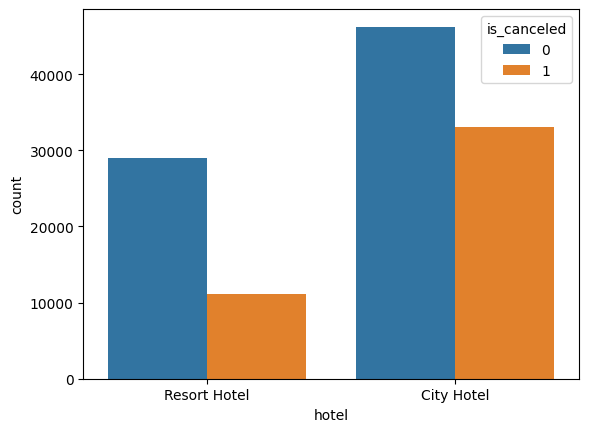

In [7]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
resort_canceled = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]
city_canceled = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]
print('Cancelations in resort hotel= ', (len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel'])))
print('Cancelations in city hotel= ', (len(city_canceled))/(len(df[df['hotel']=='City Hotel'])))

In [8]:
import dython
from dython.nominal import associations

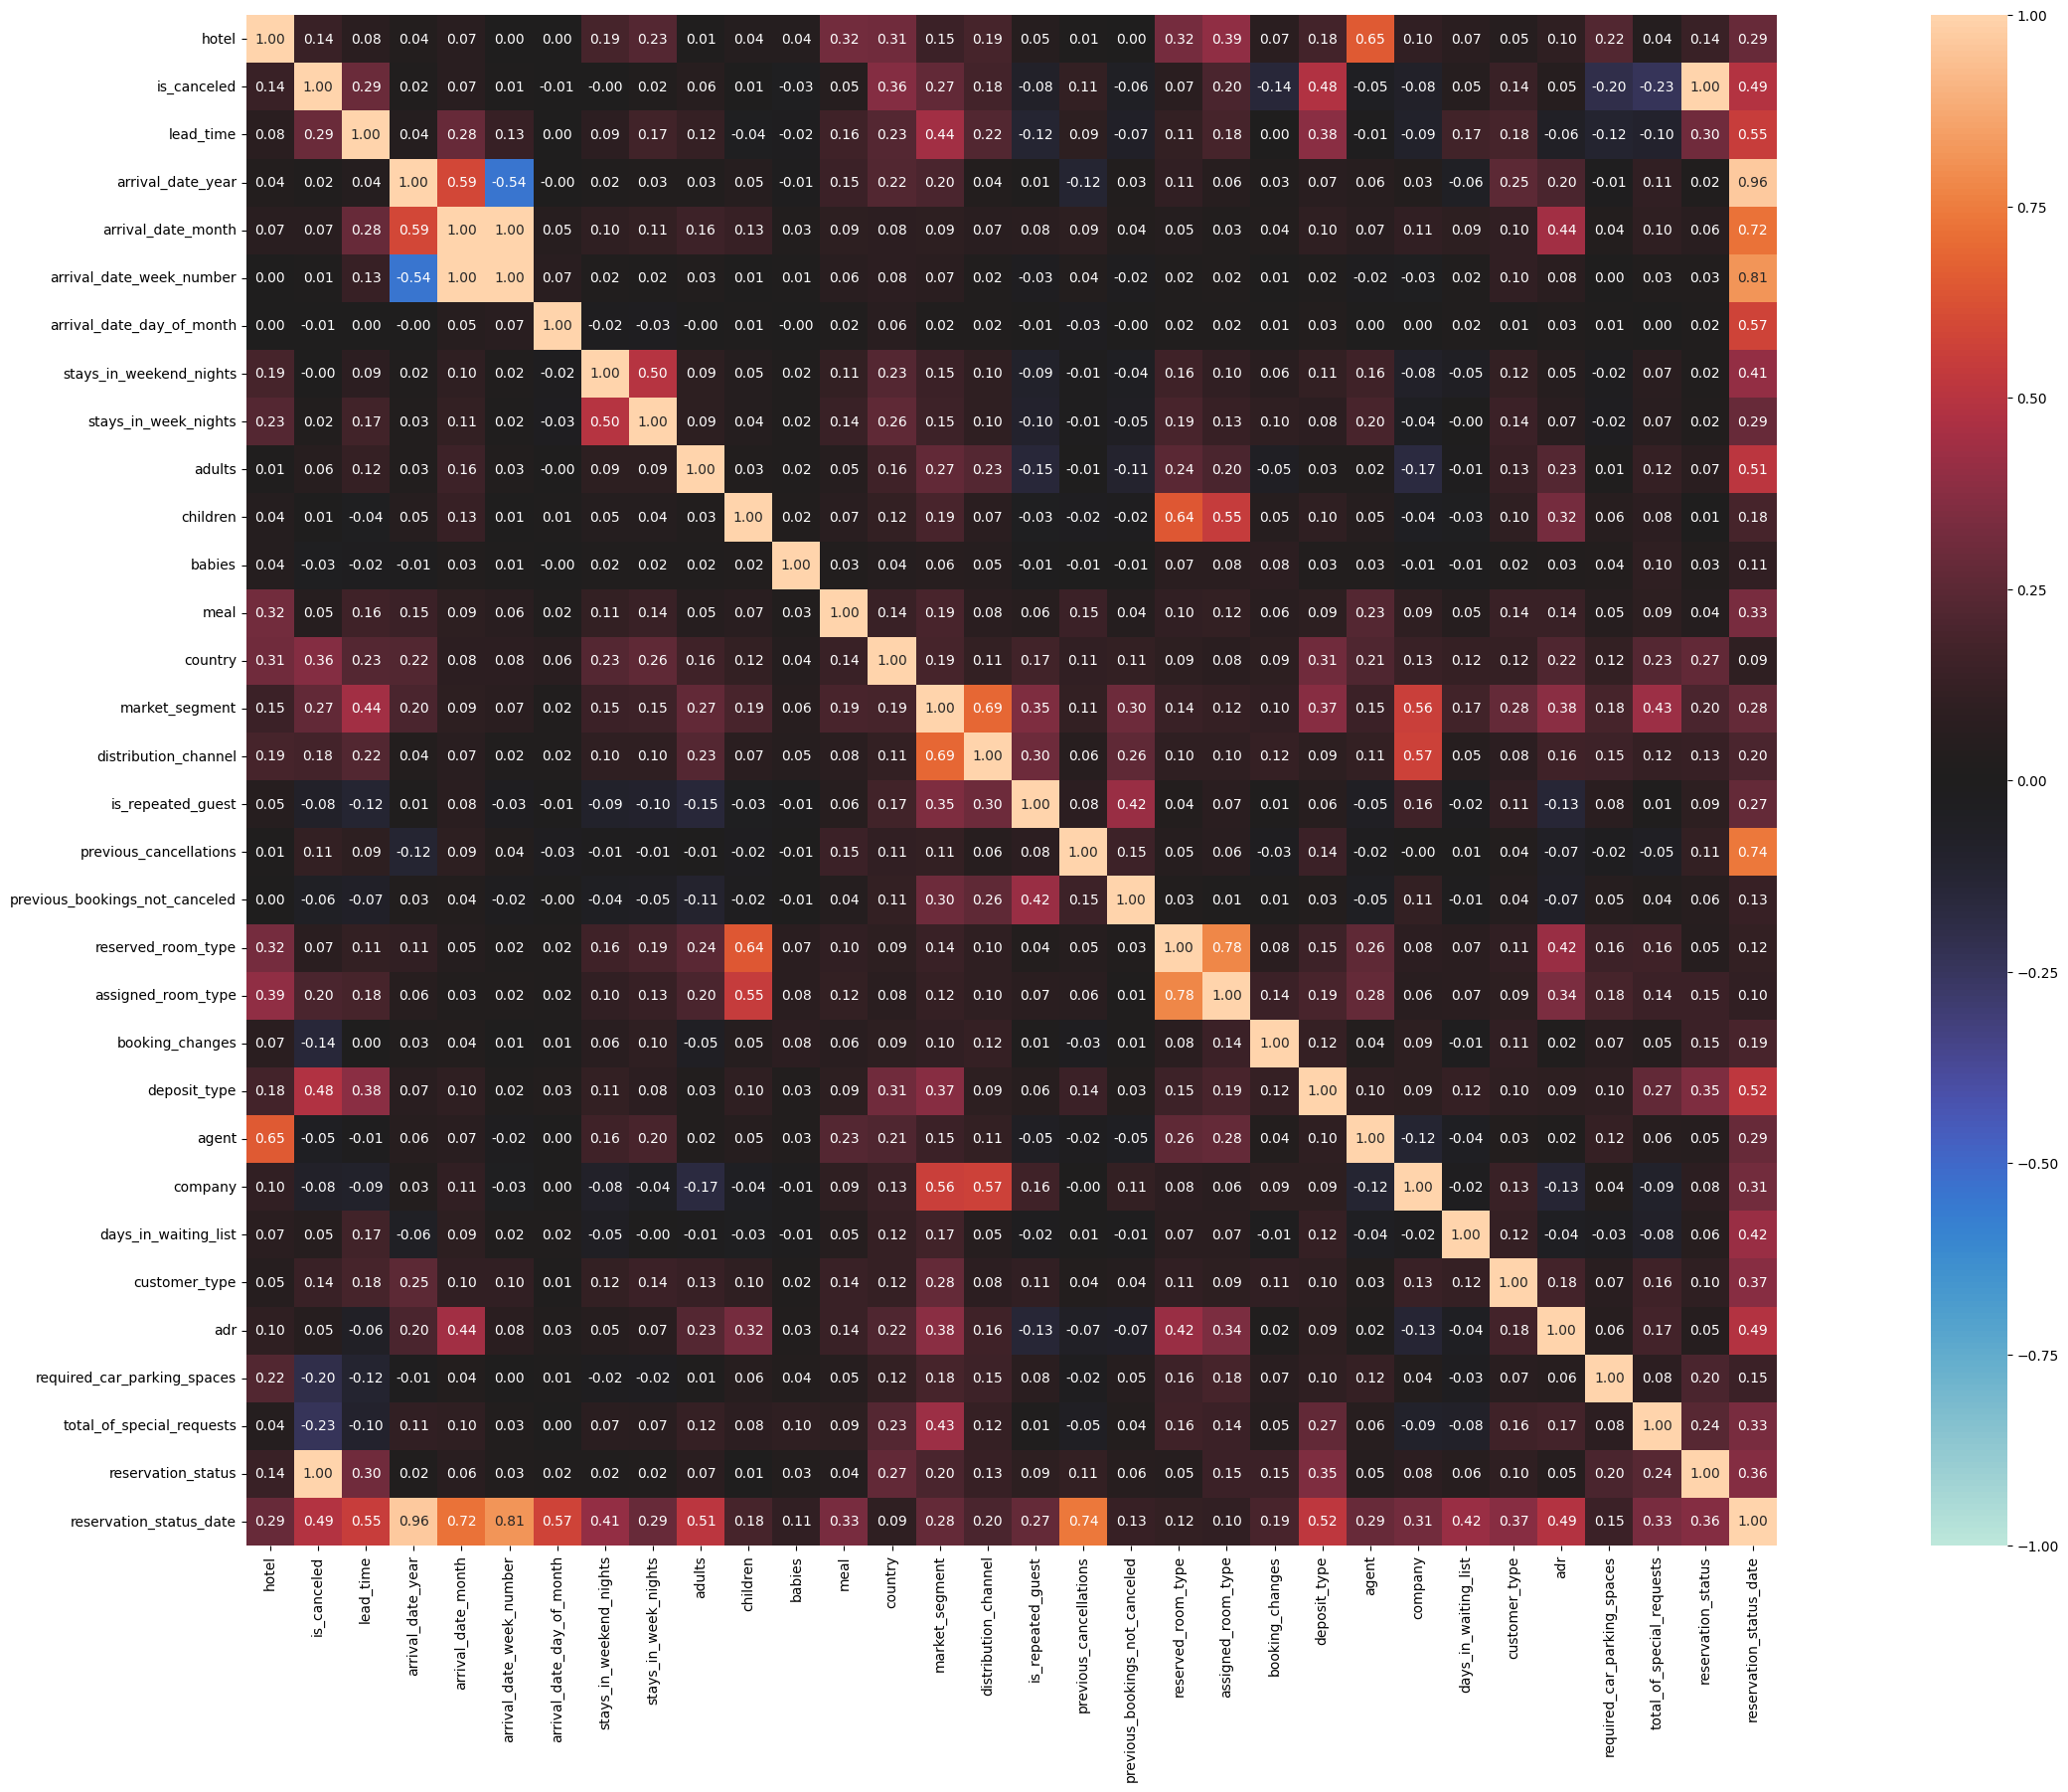

In [10]:
associations(df, figsize = (40, 20))
plt.show()


C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


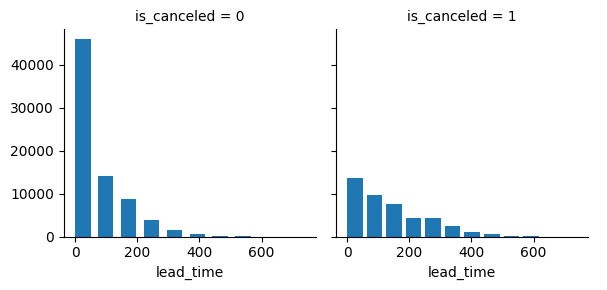

In [9]:
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()

In [10]:
print(len(df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0)])) 

715


In [11]:
((len(df.loc[(df['children']!=0) | (df['babies']!=0)]))/(len(df))) * 100

7.819750397855767

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


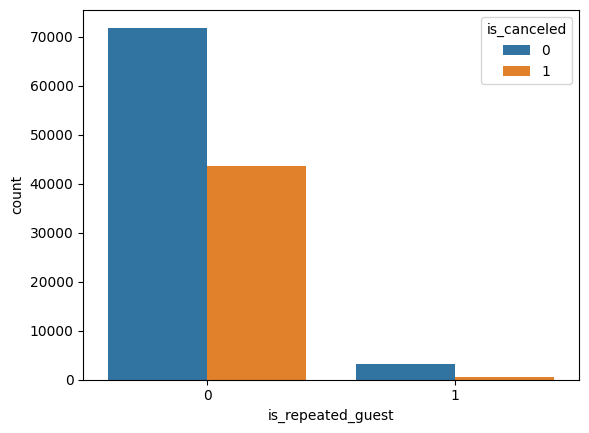

In [12]:
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
new_guest = df[(df['is_repeated_guest']==0) & (df['is_canceled']==1)]
old_guest = df[(df['is_repeated_guest']==1) & (df['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(df[df['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(df[df['is_repeated_guest']==1])))

<Axes: xlabel='previous_cancellations', ylabel='count'>

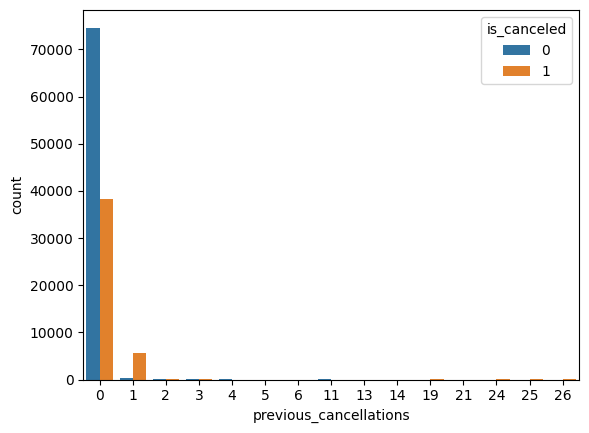

In [13]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')

In [14]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    94.623584
1     5.376416
Name: is_canceled, dtype: float64

<Axes: xlabel='booking_changes', ylabel='is_canceled'>

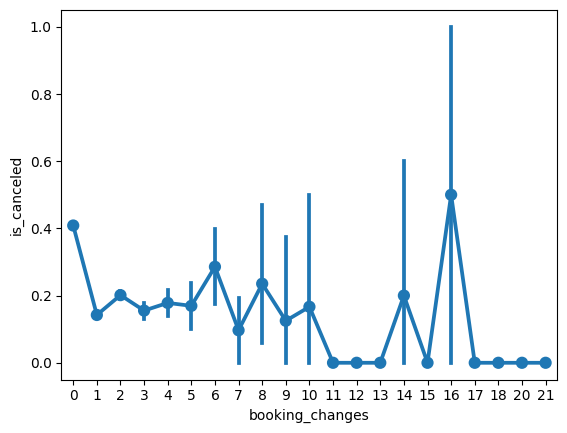

In [15]:
sns.pointplot(data=df, x='booking_changes', y='is_canceled')

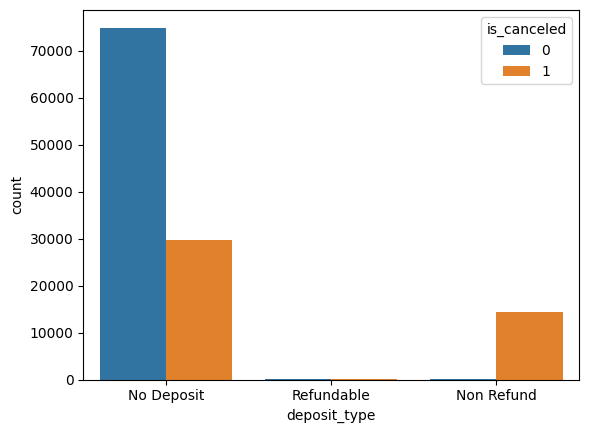

In [16]:
sns.countplot(x="deposit_type", hue="is_canceled",data=df);

C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


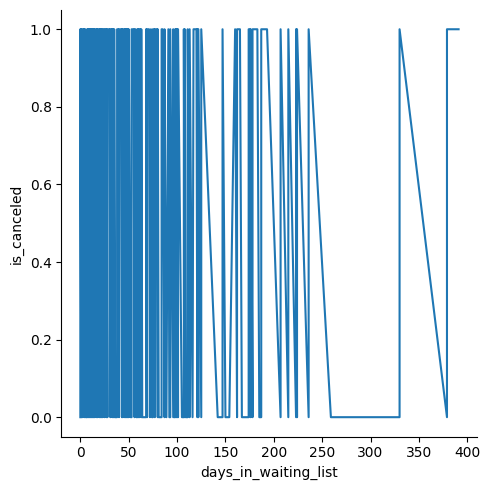

In [17]:
sns.relplot(data=df, x='days_in_waiting_list', y='is_canceled', kind='line', estimator=None)

<Axes: xlabel='arrival_date_year', ylabel='count'>

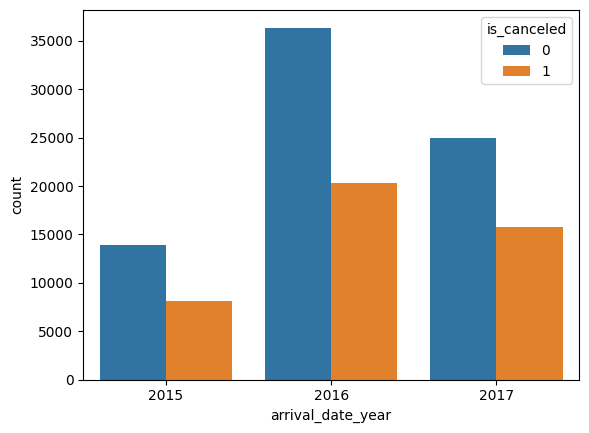

In [18]:
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


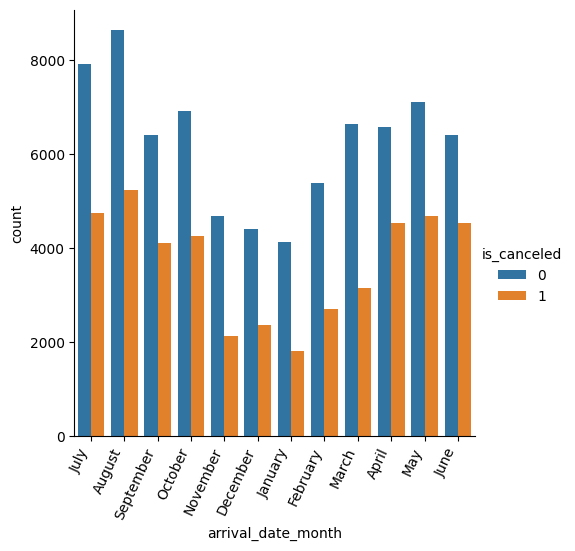

In [19]:
chart = sns.catplot(data=df, x='arrival_date_month', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

In [20]:
year_count = df.groupby(['arrival_date_year', 'is_canceled']).size().to_frame(name='count')
year_perct = year_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(year_perct)

month_count = df.groupby(['arrival_date_month', 'is_canceled']).size().to_frame(name='count')
month_perct = month_count.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(month_perct)

                                   count
arrival_date_year is_canceled           
2015              0            62.984179
                  1            37.015821
2016              0            64.136703
                  1            35.863297
2017              0            61.302136
                  1            38.697864
                                    count
arrival_date_month is_canceled           
April              0            59.202814
                   1            40.797186
August             0            62.246883
                   1            37.753117
December           0            65.029499
                   1            34.970501
February           0            66.584036
                   1            33.415964
January            0            69.522685
                   1            30.477315
July               0            62.546402
                   1            37.453598
June               0            58.542828
                   1            41.457172


C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


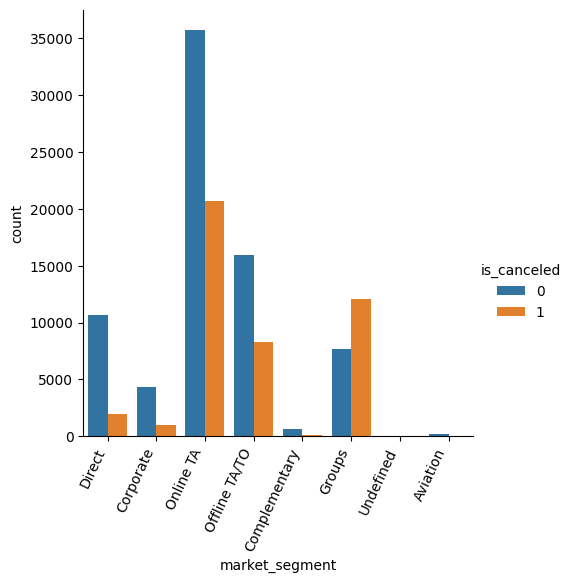

In [21]:
chart = sns.catplot(data=df, x='market_segment', kind='count', hue='is_canceled')
chart.set_xticklabels(rotation=65, horizontalalignment='right')

<Axes: xlabel='distribution_channel', ylabel='count'>

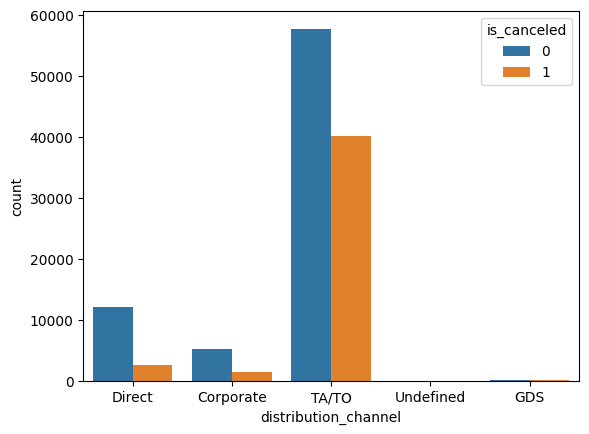

In [22]:
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')

Transient          75.059050
Transient-Party    21.043638
Contract            3.414021
Group               0.483290
Name: customer_type, dtype: float64


<Axes: xlabel='customer_type', ylabel='count'>

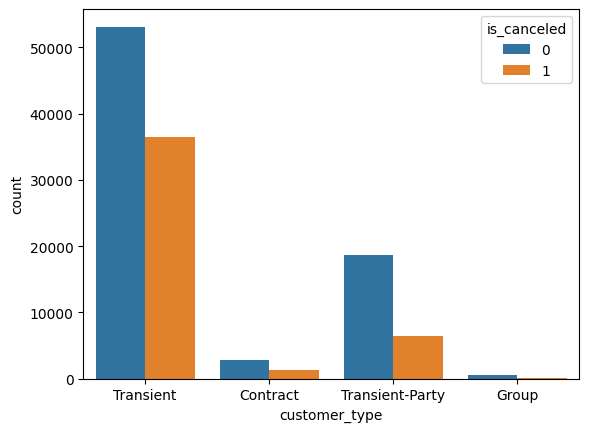

In [23]:
print(df['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='customer_type', hue='is_canceled')

In [24]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


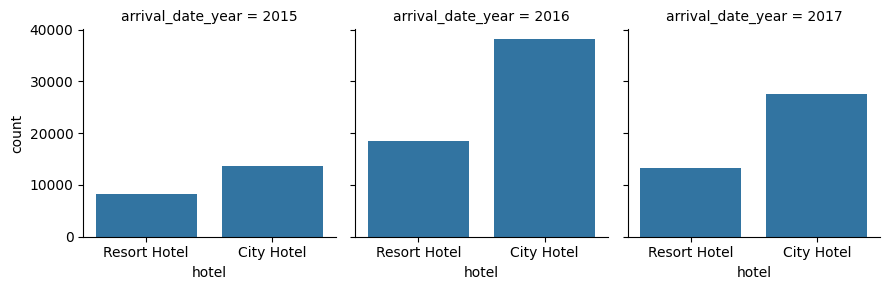

In [25]:
grid = sns.FacetGrid(df, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')

C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


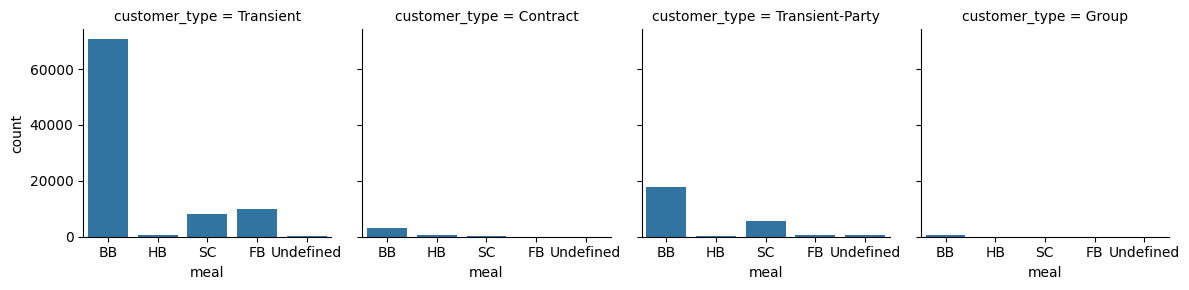

In [26]:
df['meal'].nunique(), df['customer_type'].nunique()
grid = sns.FacetGrid(df, col='customer_type')
grid.map(sns.countplot, 'meal')

In [27]:
df.pivot_table(columns='hotel', values='country', aggfunc=lambda x:x.mode())

hotel,City Hotel,Resort Hotel
country,PRT,PRT


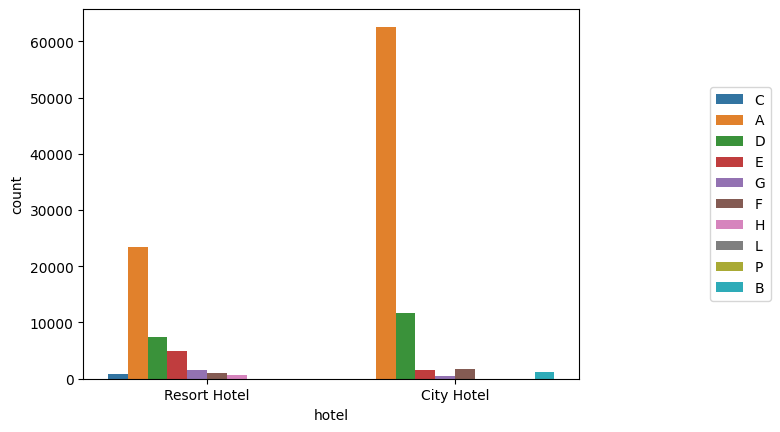

In [28]:
g = sns.countplot(data=df, x='hotel', hue='reserved_room_type')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\naths\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


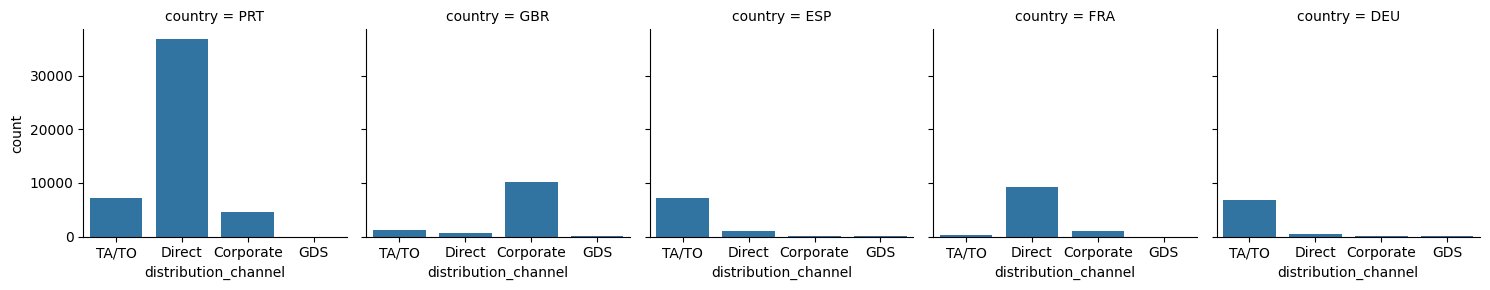

In [29]:
temp = df.loc[(df['country']=='PRT') | (df['country']=='GBR') | (df['country']=='FRA') | (df['country']=='ESP') | (df['country']=='DEU')]
grid = sns.FacetGrid(temp, col='country')
grid.map(sns.countplot, 'distribution_channel')

In [30]:
month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}

In [31]:
df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

In [32]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [33]:
df['children'] = df['children'].fillna(0)
df['offspring'] = (df['children'] + df['babies']).astype(int)

In [34]:
df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

In [35]:
df['country'].fillna(df['country'].mode()[0], inplace=True)
df['agent'].fillna(df['agent'].mode()[0], inplace=True)
df['company'].fillna(df['company'].mode()[0], inplace=True)

In [36]:
for i in range(len(df)):
    if df.loc[i, 'country'] == 'PRT':
        df.at[i, 'country'] = 1
    elif df.loc[i, 'country'] == 'GBR':
        df.at[i, 'country'] = 2
    else:
        df.at[i, 'country'] = 0

In [37]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [38]:
df['stay_duration'] = df['reservation_status_date'] - df['arrival_date']
df['stay_duration'] = df['stay_duration'] / np.timedelta64(1, 'D')
df['stay_duration'] = df['stay_duration'].astype(int)

In [39]:
for i in range(len(df)):
    if df.loc[i, 'stay_duration']<0:
        df.at[i, 'stay_duration'] = -1

In [40]:
lb = LabelEncoder()
var = ['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country']
for item in var:
    df[item] = lb.fit_transform(df[item])
df = pd.get_dummies(df, columns=['hotel', 'customer_type', 'deposit_type', 'change_in_room', 'market_segment', 'distribution_channel', 'country'])

In [41]:
df.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'arrival_date'], axis=1, inplace=True)

In [42]:
train_var = df.drop(['is_canceled'], axis=1)
test_var = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(train_var, test_var, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95512, 50), (95512,), (23878, 50), (23878,))

In [44]:
X_train

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,offspring,total_bookings,stay_duration,hotel_0,hotel_1,customer_type_0,customer_type_1,customer_type_2,customer_type_3,deposit_type_0,deposit_type_1,deposit_type_2,change_in_room_0,change_in_room_1,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,market_segment_7,distribution_channel_0,distribution_channel_1,distribution_channel_2,distribution_channel_3,distribution_channel_4,country_0,country_1,country_2
25438,101,2016,June,26,25,1,1,3,1.0,0,0,0,0,5,250.0,40.0,0,274.00,1,0,1,0,2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
95177,136,2016,August,33,11,2,3,1,1.0,0,0,0,0,2,11.0,40.0,0,86.36,0,1,1,0,5,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
4697,147,2016,March,14,28,2,5,2,0.0,0,0,0,0,0,9.0,40.0,0,73.00,0,0,0,0,7,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
99994,86,2016,October,43,20,0,3,4,0.0,0,0,0,0,1,7.0,40.0,0,192.86,0,1,0,0,3,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
75832,337,2015,September,38,19,2,2,2,0.0,0,0,1,0,0,1.0,40.0,0,62.00,0,0,0,1,-1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62922,130,2017,January,4,25,0,2,2,0.0,0,0,0,0,0,9.0,40.0,0,71.28,0,2,0,0,-1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
102973,259,2016,December,50,7,0,4,2,0.0,0,0,0,0,0,9.0,40.0,0,73.95,0,1,0,0,4,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
99080,0,2016,October,41,7,0,2,2,0.0,0,0,0,0,0,7.0,40.0,0,147.60,0,1,0,0,2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
93213,248,2016,July,30,17,2,0,2,0.0,0,0,0,0,0,14.0,40.0,0,90.25,0,0,0,0,2,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [49]:
del X_test["arrival_date_month"]

In [50]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

In [51]:
#Logistic Regression
logreg = LogisticRegression(max_iter=500).fit(X_train_mm, y_train)
scores = cross_val_score(logreg, X_train_mm, y_train, cv=5)
logreg_pred = logreg.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(logreg.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, logreg_pred)))
print(confusion_matrix(y_test, logreg_pred))

Average cross validation score: 0.990
Test accuracy: 0.992
F1 score: 0.989
[[15094    18]
 [  180  8586]]


In [52]:
#Linear SVC
svc = LinearSVC().fit(X_train_mm, y_train)
scores = cross_val_score(svc, X_train_mm, y_train, cv=5)
svc_pred = svc.predict(X_test_mm)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(svc.score(X_test_mm, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, svc_pred)))
print(confusion_matrix(y_test, svc_pred))

Average cross validation score: 0.995
Test accuracy: 0.996
F1 score: 0.994
[[15108     4]
 [  103  8663]]


In [53]:
#SGD Classifier
sgd = SGDClassifier(alpha=0.1).fit(X_train_std, y_train)
scores = cross_val_score(sgd, X_train_std, y_train, cv=5)
sgd_pred = sgd.predict(X_test_std)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(sgd.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, sgd_pred)))
print(confusion_matrix(y_test, sgd_pred))

Average cross validation score: 0.988
Test accuracy: 0.988
F1 score: 0.984
[[15103     9]
 [  267  8499]]


In [54]:
#Ridge Classifier
rc = RidgeClassifier(alpha=1, normalize=True)
rc.fit(X_train, y_train)
scores = cross_val_score(rc, X_train, y_train, cv=5)
rc_pred = rc.predict(X_test)
print("Normalized data:")
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(rc.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rc_pred)))
print(confusion_matrix(y_test, rc_pred))

rc = RidgeClassifier(alpha=1)
rc.fit(X_train_std, y_train)
scores = cross_val_score(rc, X_train_std, y_train, cv=5)
rc_pred = rc.predict(X_test_std)
print("Standard scaled data:")
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(rc.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, rc_pred)))
print(confusion_matrix(y_test, rc_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), RidgeClassifier())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



Normalized data:
Average cross validation score: 0.919
Test accuracy: 0.920
F1 score: 0.878
[[15099    13]
 [ 1892  6874]]
Standard scaled data:
Average cross validation score: 0.986
Test accuracy: 0.987
F1 score: 0.982
[[15109     3]
 [  308  8458]]


In [55]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
scores = cross_val_score(tree, X_train, y_train, cv=5)
tree_pred = tree.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.994
Test accuracy: 0.993
F1 score: 0.991
[[14950   162]
 [    0  8766]]


In [56]:
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [57]:
#Random Forest
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.9978327474181767
Test score: 0.998
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 100}
Best score: 0.9979060228266328
Test score: 0.997


In [58]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
scores = cross_val_score(gnb, X_train, y_train, cv=5)
gnb_pred = gnb.predict(X_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(gnb.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, gnb_pred)))
print(confusion_matrix(y_test, gnb_pred))

Average cross validation score: 0.957
Test accuracy: 0.957
F1 score: 0.938
[[15075    37]
 [  990  7776]]


In [59]:
#Multi Layer Perceptron
mlp = MLPClassifier(hidden_layer_sizes=[35, 20], alpha=0.001, solver='adam', activation='relu')
mlp.fit(X_train_std, y_train)
mlp_pred = mlp.predict(X_test_std)
print("Train score: {:.3f}".format(mlp.score(X_train_std, y_train)))
print("Test accuracy: {:.3f}".format(mlp.score(X_test_std, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, mlp_pred)))
print(confusion_matrix(y_test, mlp_pred))

Train score: 1.000
Test accuracy: 1.000
F1 score: 0.999
[[15106     6]
 [    5  8761]]


In [60]:
#Adaboost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
scores = cross_val_score(ada, X_train, y_train, cv=5)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(ada.score(X_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, ada_pred)))
print(confusion_matrix(y_test, ada_pred))

Average cross validation score: 1.000
Test accuracy: 0.999
F1 score: 0.999
[[15106     6]
 [    6  8760]]
